In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-poster')
%matplotlib inline

<ErrorbarContainer object of 3 artists>

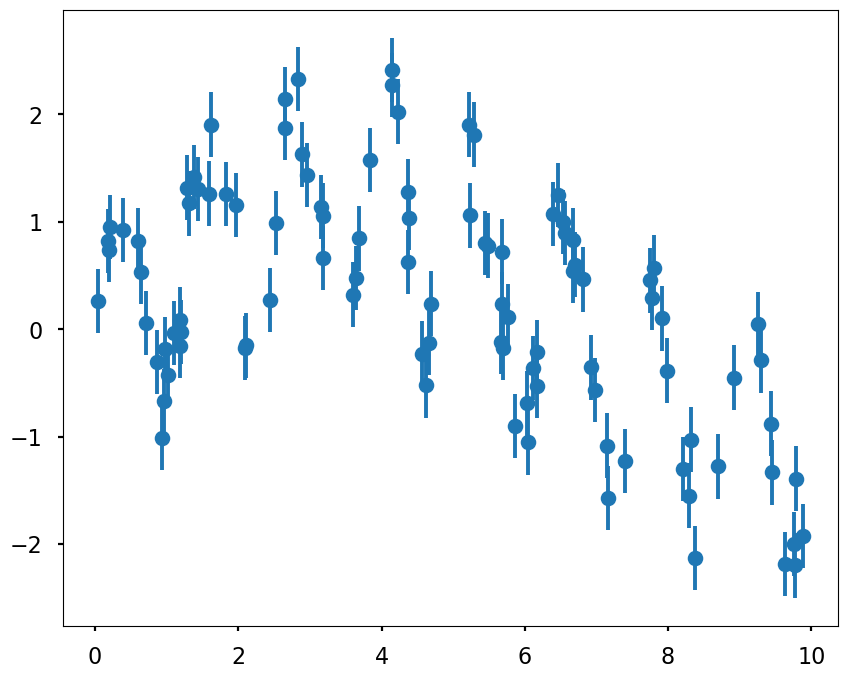

In [2]:
np.random.seed(0)
x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

plt.figure(figsize = (10,8))
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

In [3]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200), \
                   max_iter = 2000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', \
                   random_state = 8)

xfit = np.linspace(0, 10, 1000)
ytrue = model(xfit, 0)
yfit = mlp.fit(x[:, None], y).predict(xfit[:, None])

plt.figure(figsize = (10,8))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', \
         zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, \
         label = 'true model', zorder = 10)
plt.legend()
plt.show()